## Import packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

# Load CSV file

In [6]:
pwd

'/home/dereje_senbatu/Automated-Storyboard-Ad-Generator/notebooks'

In [9]:
# Load CSV file
data = pd.read_csv('../data/Challenge_Data/performance_data.csv')

# Display the first few rows of the dataframe
data.head()


,game_id,preview_link,ER,CTR
0,bfbf7a2b7ac635e67877b1ab87fd6629,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.209269,0.058438
1,945010afbf9a55bbdffcb0895f946155,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.274552,0.074731
2,e68e20f592457b875ce29757ab855dfe,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.103688,0.042228
3,adunit-nestle-purina-friskies-mob,https://s3.ap-southeast-1.amazonaws.com/a.futu...,0.136963,0.005393
4,adunit-lionsgate-uwomt-user-slider-sensory-vid...,https://s3.us-west-1.amazonaws.com/a.futureadl...,0.114208,0.016443


## Data Columns Explanation

- **game_id**: This column contains unique identifiers for each game or advertisement. It is used to distinguish between different entries in the dataset.

- **preview_link**: This column contains URLs to preview the ads or games. These links allow you to see the visual representation of each ad.

- **ER (Engagement Rate)**: Engagement Rate (ER) measures the level of interaction that a piece of content (in this case, an ad) receives from its audience. It is often expressed as a percentage and can be calculated using various methods, but a common formula is:

  $
  \text{ER} = \left( \frac{\text{Total Engagements (likes, shares, comments, etc.)}}{\text{Total Impressions}} \right) \times 100
  $

  This metric helps in understanding how engaging the ad is for the audience.

- **CTR (Click-Through Rate)**: Click-Through Rate (CTR) measures the number of clicks an ad receives divided by the number of times the ad is shown (impressions), expressed as a percentage. The formula for CTR is:

  $
  \text{CTR} = \left( \frac{\text{Total Clicks}}{\text{Total Impressions}} \right) \times 100
  $

  This metric helps in understanding how effective the ad is at encouraging viewers to click on it.


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   game_id       905 non-null    object 
 1   preview_link  905 non-null    object 
 2   ER            905 non-null    float64
 3   CTR           905 non-null    float64
dtypes: float64(2), object(2)
memory usage: 28.4+ KB


In [14]:
#check missing values
data.isnull().sum()

game_id         0
preview_link    0
ER              0
CTR             0
dtype: int64

In [15]:
# summary of the data
data.describe()

,ER,CTR
count,905.000000,905.000000
mean,0.136318,0.034466
std,0.091524,0.036967
min,0.000000,0.000000
25%,0.070338,0.007926
50%,0.118624,0.024537
75%,0.190722,0.047796
max,0.524498,0.297410


In [16]:
# Inspect specific columns
print("Sample Data:")
print(data.sample(5))

# Check for unique values in key columns
print("Unique values in 'game_id' column:", data['game_id'].nunique())
print("Preview link sample:", data['preview_link'].sample(1))
print("Unique values in 'CTR' column:", data['CTR'].unique())
print("Unique values in 'ER' column:", data['ER'].unique())


Sample Data:
                                               game_id  \
609  adunit-nestle-maggi-varieties-bouillon-ar-ksa-mob   
125                   92ecf0b80b7483c89eb72a551484970a   
762                   5c58461a764afd15c527c9c8b3a054b2   
678                   676e0507f9e1ed8fa6880eafcf91547b   
314                   d60dcbc971efa0b4c3cb76c245c35ced   

                                          preview_link        ER       CTR  
609  https://s3.ap-southeast-1.amazonaws.com/a.futu...  0.195181  0.026027  
125  https://s3.us-east-1.amazonaws.com/a.futureadl...  0.254543  0.067422  
762  https://s3.us-east-1.amazonaws.com/a.futureadl...  0.137924  0.054192  
678  https://s3.us-east-1.amazonaws.com/a.futureadl...  0.112509  0.039275  
314  https://s3.us-west-1.amazonaws.com/a.futureadl...  0.028318  0.007933  
Unique values in 'game_id' column: 905
Preview link sample: 441    https://s3.ap-southeast-1.amazonaws.com/a.futu...
Name: preview_link, dtype: object
Unique values in 'CTR' co

In [18]:

# Check for unique values in 'game_id' column
unique_game_ids = data['game_id'].nunique()
print("Unique values in 'game_id' column:", unique_game_ids)

# Additional check
total_rows = data.shape[0]
print("Total number of rows in the dataframe:", total_rows)

# check for duplications
if unique_game_ids < total_rows:
    print("There are duplicate game IDs in the data.")
else:
    print("Each game ID is unique.")

Unique values in 'game_id' column: 905
Total number of rows in the dataframe: 905
Each game ID is unique.



#### Understanding:

Upon inspecting the dataset, I've confirmed that there are 905 unique 'game_id's, which perfectly matches the total number of rows in the dataframe. This means that each row in the dataset represents a distinct and unique game or advertisement, with no duplicates.

This discovery is particularly significant for several reasons:

1. **Data Integrity and Reliability**:
   The uniqueness of 'game_id' assures me that the dataset is well-maintained and reliable. Every entry is a unique record, which eliminates the risk of counting the same ad multiple times. This level of data integrity is essential for any subsequent analysis or decision-making process.

2. **Accurate Performance Metrics**:
   Given that each 'game_id' is unique, the performance metrics such as Engagement Rate (ER) and Click-Through Rate (CTR) are attributable to individual ads without any ambiguity. This accuracy is crucial for evaluating the effectiveness of each ad. I can confidently analyze which ads are performing well and which ones need improvement, knowing that my data is clean and precise.

3. **Simplified Data Management**:
   Managing the dataset becomes straightforward when each 'game_id' is unique. Tasks such as grouping, filtering, and aggregating data are hassle-free. There's no need for additional steps to handle duplicate records, making my workflow more efficient and less error-prone.

4. **Trustworthy Insights for Decision-Making**:
   The confidence that comes from knowing each 'game_id' is unique translates into more trustworthy insights. Whether I'm reporting to stakeholders, developing strategies, or training machine learning models, I can rely on the fact that my dataset accurately represents individual ad performances.


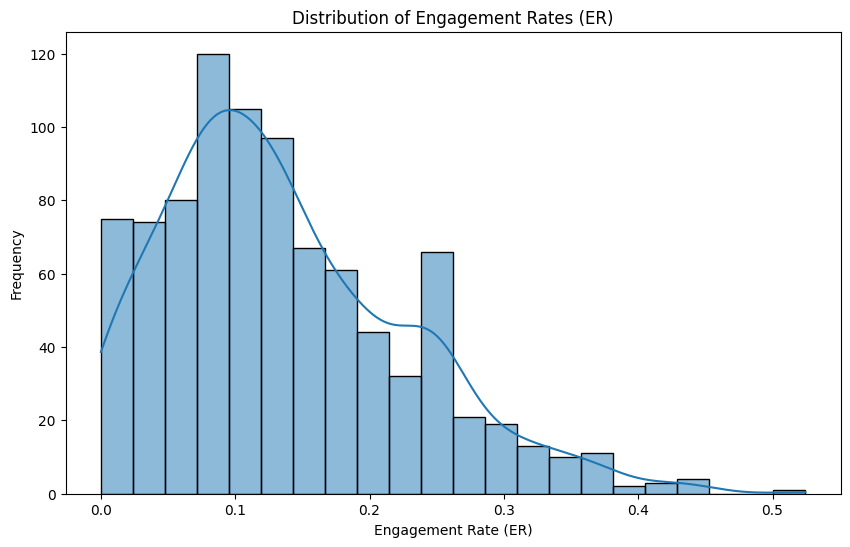

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Engagement Rates (ER)
plt.figure(figsize=(10, 6))
sns.histplot(data['ER'], kde=True)
plt.title('Distribution of Engagement Rates (ER)')
plt.xlabel('Engagement Rate (ER)')
plt.ylabel('Frequency')
plt.show()



### Analysis of Engagement Rate (ER) Distribution

The ER distribution reveals that ads typically achieve moderate engagement, with most falling between 0.05 and 0.2. The presence of two peaks suggests that some ads are more engaging than others, likely due to differences in content quality or targeting. The long tail of high engagement rates, although less frequent, highlights the potential for some ads to perform exceptionally well.


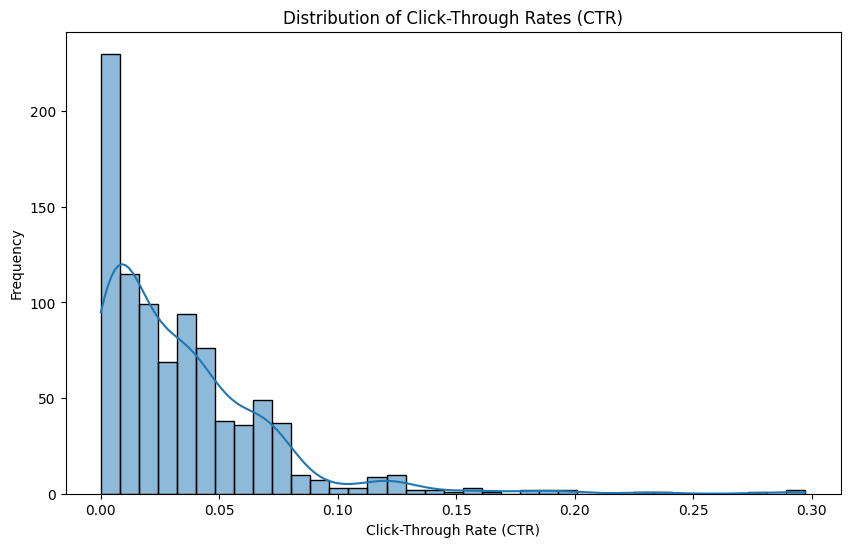

In [24]:

# Distribution of Click-Through Rates (CTR)
plt.figure(figsize=(10, 6))
sns.histplot(data['CTR'], kde=True)
plt.title('Distribution of Click-Through Rates (CTR)')
plt.xlabel('Click-Through Rate (CTR)')
plt.ylabel('Frequency')
plt.show()


### Analysis of Click-Through Rate (CTR) Distribution

It's clear that most ads have a low click-through rate (CTR), with the majority clustering between 0.00 and 0.05. This suggests that while many ads are being displayed, only a small fraction are effectively engaging users to the point of clicking.

The presence of a long tail in the distribution highlights that although less common, some ads achieve significantly higher CTRs. These high-performing ads can provide valuable insights into what works well in engaging audiences.

The sharp drop-off in frequency as CTR increases further emphasizes the challenge in creating highly effective ads. The mode of the distribution around 0.01 indicates that this is the most common CTR value, suggesting a benchmark for evaluating ad performance.


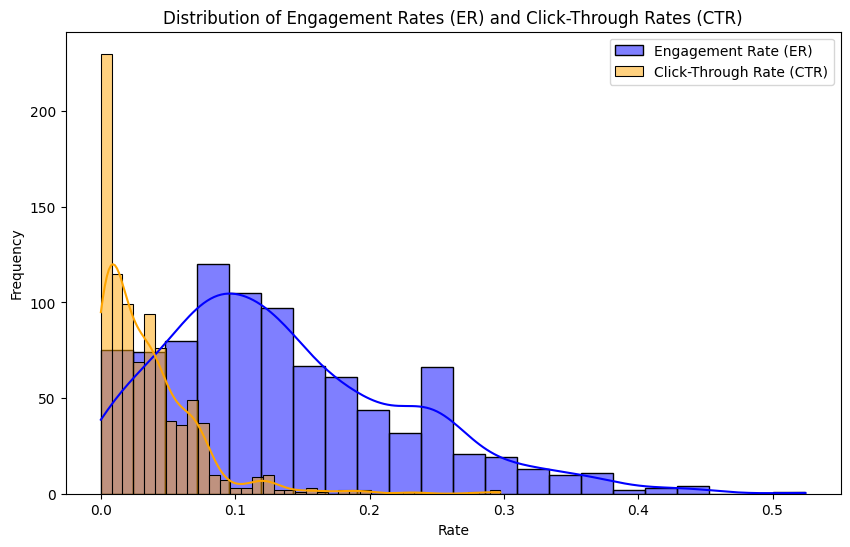

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Engagement Rates (ER) and Click-Through Rates (CTR)
plt.figure(figsize=(10, 6))

# Histogram for Engagement Rates (ER)
sns.histplot(data['ER'], kde=True, color='blue', label='Engagement Rate (ER)')

# Histogram for Click-Through Rates (CTR)
sns.histplot(data['CTR'], kde=True, color='orange', label='Click-Through Rate (CTR)')

# Adding title and labels
plt.title('Distribution of Engagement Rates (ER) and Click-Through Rates (CTR)')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.legend()

# Display the plot
plt.show()


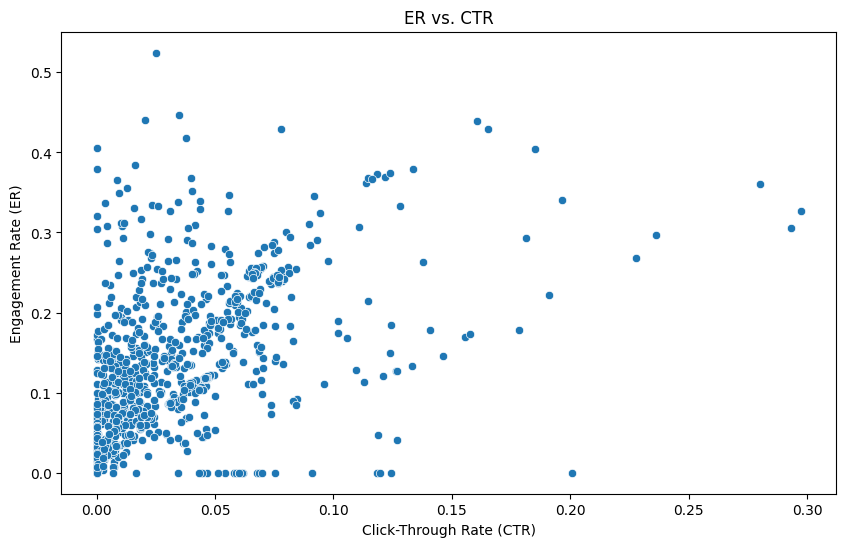

In [25]:

# ER vs. CTR Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CTR', y='ER', data=data)
plt.title('ER vs. CTR')
plt.xlabel('Click-Through Rate (CTR)')
plt.ylabel('Engagement Rate (ER)')
plt.show()

In [29]:

# Calculate the correlation coefficient
correlation = data['ER'].corr(data['CTR'])
print(f"Correlation between ER and CTR: {correlation:.2f}")


Correlation between ER and CTR: 0.45


           ER       CTR
ER   1.000000  0.453146
CTR  0.453146  1.000000


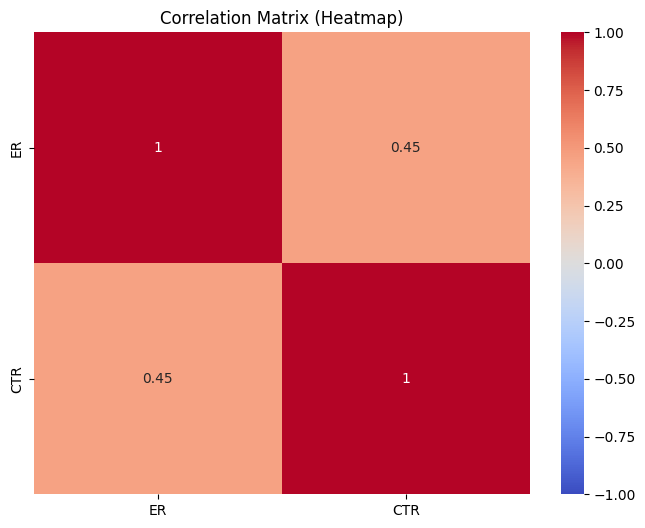

In [31]:
# Calculate the correlation matrix
correlation_matrix = data[['ER', 'CTR']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Heatmap)')
plt.show()
